## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


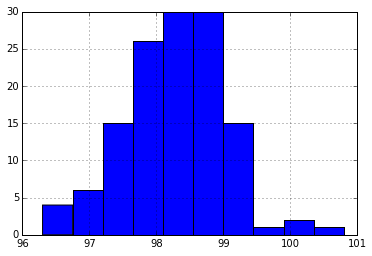

In [3]:
df['temperature'].hist()

From the histgram, we see that the distribution of human boday temperature is nearly normal.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.1+ KB


Answer for question 1: From above we see there are more than 30 samples for temperature, so we use z-test to do the hypothesis testing.

In [5]:
df['temperature'].describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

The hypothesis testing process for the mean:

1. Set Hypothesis:
   H0: u = 98.6 
   HA: u != 98.6
  
2. Calculate the point estimate:
   ave = 98.25

3. Check Conditions
   1) indepedence: n < 10% population
   2) sample size: n > 30

4. Calculate the Z-score
   z = (98.249231 - 98.6) / (std / sqrt(n))

5. Get the p-value

In [6]:
import math
z = (98.249231 - 98.6) * math.sqrt(130) / 0.733183
z

-5.454820879461186

Answer for question 2:

Based on z score, p < 0.00001 < 0.05
So, the result is significant. We reject H0. 
The data provides convincing evidence that the true body temperature mean is not 98.6 degree.

Here, it is appropriate to use z-test since the distribution of temperature is nearly normal, and the sample size is larger than 30.

In [10]:
# First, calculate the stardard error
std = 0.733183
n = 130

SE = std / math.sqrt(n)
SE

0.06430440297695857

In [11]:
# Second, calculate the margin of error
# We assume the confidence interval is 95%
CI = 0.95

ME = 1.96 * SE
ME

0.1260366298348388

In [14]:
# Calculate the margin of the 95% confidence interval
mean = 98.249231

Max = mean + ME
Min = mean - ME

(Min, Max)

(98.12319437016515, 98.37526762983484)

Answer for question 3: 
People with body temperature beyond (98.1, 98.4) will be be considered abnormal with 95% confidence interval.

In [27]:
# Question 4:

df_m = df.loc[df['gender'] == 'M']
df_m.head()

,temperature,gender,heart_rate
2,97.8,M,73
5,99.2,M,83
6,98.0,M,71
7,98.8,M,78
12,98.2,M,72


In [29]:
df_f = df.loc[df['gender'] == 'F']
df_f.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
3,99.2,F,66
4,98.0,F,73
8,98.4,F,84


In [33]:
df_f = df_f[(df_f.temperature >= 98.1) & (df_f.temperature <= 98.4)]
df_f

,temperature,gender,heart_rate
1,98.4,F,81
8,98.4,F,84
16,98.3,F,79
20,98.3,F,78
27,98.2,F,69
28,98.4,F,73
40,98.4,F,79
51,98.3,F,80
54,98.2,F,73
58,98.2,F,65


In [34]:
df_m = df_m[(df_m.temperature >= 98.1) & (df_m.temperature <= 98.4)]
df_m

,temperature,gender,heart_rate
12,98.2,M,72
17,98.2,M,64
21,98.2,M,71
23,98.4,M,68
29,98.1,M,67
30,98.3,M,86
37,98.3,M,72
41,98.4,M,82
57,98.2,M,66
61,98.4,M,84


In [45]:
df_f.describe()

,temperature,heart_rate
count,15.000000,15.000000
mean,98.280000,74.000000
std,0.101419,7.549834
min,98.100000,57.000000
25%,98.200000,71.000000
50%,98.300000,74.000000
75%,98.400000,79.500000
max,98.400000,84.000000


In [46]:
df_m.describe()

,temperature,heart_rate
count,12.000000,12.000000
mean,98.266667,72.916667
std,0.115470,7.242028
min,98.100000,64.000000
25%,98.200000,67.750000
50%,98.250000,71.500000
75%,98.400000,75.250000
max,98.400000,86.000000


Since the sample size < 30, we use t-test for this case:

The hypothesis testing process for the two sample with male and female:
1. Set Hypothesis: H0: u = 0 HA: u != 0
2. Calculate the point estimate: ave = 98.280000 - 98.266667
3. Check Conditions 1) indepedence: n < 10% population 2) sample size: n < 30
4. Calculate the t-score: t = ave / sqrt(square of std_f / std_f_count + square of std_m / std_m_count)
5. Calcualte the Degree of Freedom (DF)
6. Get the p-value

In [55]:
t = (98.280000 - 98.266667) / math.sqrt(0.101419 ** 2 / 15 + 0.115470 ** 2 / 12)
t

0.31453882913126835

In [56]:
DF = (0.101419 ** 2 / 15 + 0.115470 ** 2 / 12) ** 2 / ((0.101419 ** 2 / 15) ** 2 / (15 - 1) + (0.115470 ** 2 / 12) ** 2 / (12 - 1))
DF

22.141023135930578

DF = 22
t = 0.3145

The P-Value is 0.756105. The result is not significant at p < 0.05. Therefore, HA is rejected and H0 is correct. 

Answer for question 4:
There is not a significant difference between males and females in normal temperature.